In [1]:
import sys
import os
sys.path.append(os.path.abspath("/data2/eranario/scratch/rgb-to-multispectral-unet"))

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from src.dataset import PotatoDataset
from src.model import VAE
# from src.util import show_predictions
from torch.utils.data import DataLoader
from tqdm import tqdm

In [3]:
# set torch random seed
torch.manual_seed(42)

# Dataset

In [4]:
rgb_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images"
spectral_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images"

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [ ]:
train_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='train',align=True)
val_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='val',align=True)
test_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='test',align=True)

# print the size of the datasets
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Loading test data: 100%|██████████| 60/60 [00:00<00:00, 297.81it/s]

Train dataset size: 240
Validation dataset size: 60
Test dataset size: 60


In [7]:
batch_size = 32
num_workers = 4

train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=num_workers
)

val_dataloader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=num_workers
)

test_dataloader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=num_workers
)

# Model

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(in_channels=3, out_channels=len(train_dataset.channels), latent_dim=128).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training

Epoch [1/200] - Training Loss: 2.3479, Validation Loss: 0.0866, SSIM: 0.0946


Epoch [2/200] - Training Loss: 0.1166, Validation Loss: 0.1343, SSIM: 0.1180


Epoch [3/200] - Training Loss: 0.0634, Validation Loss: 0.0505, SSIM: 0.1163


Epoch [4/200] - Training Loss: 0.0432, Validation Loss: 0.0397, SSIM: 0.1222


Epoch [5/200] - Training Loss: 0.0364, Validation Loss: 0.0360, SSIM: 0.1209


Epoch [6/200] - Training Loss: 0.0348, Validation Loss: 0.0340, SSIM: 0.1193


Epoch [7/200] - Training Loss: 0.0346, Validation Loss: 0.0332, SSIM: 0.1195


Epoch [8/200] - Training Loss: 0.0340, Validation Loss: 0.0323, SSIM: 0.1203


Epoch [9/200] - Training Loss: 0.0345, Validation Loss: 0.0322, SSIM: 0.1207


Epoch [10/200] - Training Loss: 0.0338, Validation Loss: 0.0321, SSIM: 0.1197


Epoch [11/200] - Training Loss: 0.0342, Validation Loss: 0.0321, SSIM: 0.1202


Epoch [12/200] - Training Loss: 0.0339, Validation Loss: 0.0320, SSIM: 0.1201


Epoch [13/200] - Training Loss: 0.0343, Validation Loss: 0.0320, SSIM: 0.1215


Epoch [14/200] - Training Loss: 0.0340, Validation Loss: 0.0319, SSIM: 0.1216


Epoch [15/200] - Training Loss: 0.0338, Validation Loss: 0.0320, SSIM: 0.1209


Epoch [16/200] - Training Loss: 0.0340, Validation Loss: 0.0319, SSIM: 0.1215


Epoch [17/200] - Training Loss: 0.0344, Validation Loss: 0.0319, SSIM: 0.1219


Epoch [18/200] - Training Loss: 0.0337, Validation Loss: 0.0320, SSIM: 0.1204


Epoch [19/200] - Training Loss: 0.0341, Validation Loss: 0.0319, SSIM: 0.1220


Epoch [20/200] - Training Loss: 0.0340, Validation Loss: 0.0319, SSIM: 0.1224


Epoch [21/200] - Training Loss: 0.0337, Validation Loss: 0.0319, SSIM: 0.1213


Epoch [22/200] - Training Loss: 0.0336, Validation Loss: 0.0319, SSIM: 0.1218


Epoch [23/200] - Training Loss: 0.0337, Validation Loss: 0.0318, SSIM: 0.1233


Epoch [24/200] - Training Loss: 0.0337, Validation Loss: 0.0319, SSIM: 0.1225


Epoch [25/200] - Training Loss: 0.0341, Validation Loss: 0.0319, SSIM: 0.1224


Epoch [26/200] - Training Loss: 0.0338, Validation Loss: 0.0319, SSIM: 0.1221


Epoch [27/200] - Training Loss: 0.0338, Validation Loss: 0.0319, SSIM: 0.1224


Epoch [28/200] - Training Loss: 0.0336, Validation Loss: 0.0318, SSIM: 0.1238


Epoch [29/200] - Training Loss: 0.0337, Validation Loss: 0.0320, SSIM: 0.1230


Epoch [30/200] - Training Loss: 0.0337, Validation Loss: 0.0318, SSIM: 0.1235


Epoch [31/200] - Training Loss: 0.0339, Validation Loss: 0.0319, SSIM: 0.1242


Epoch [32/200] - Training Loss: 0.0337, Validation Loss: 0.0318, SSIM: 0.1237


Epoch [33/200] - Training Loss: 0.0338, Validation Loss: 0.0318, SSIM: 0.1237


Epoch [34/200] - Training Loss: 0.0339, Validation Loss: 0.0317, SSIM: 0.1253


Epoch [35/200] - Training Loss: 0.0338, Validation Loss: 0.0318, SSIM: 0.1257


Epoch [36/200] - Training Loss: 0.0338, Validation Loss: 0.0317, SSIM: 0.1285


Epoch [37/200] - Training Loss: 0.0334, Validation Loss: 0.0318, SSIM: 0.1286


Epoch [38/200] - Training Loss: 0.0336, Validation Loss: 0.0317, SSIM: 0.1318


Epoch [39/200] - Training Loss: 0.0335, Validation Loss: 0.0317, SSIM: 0.1338


Epoch [40/200] - Training Loss: 0.0337, Validation Loss: 0.0317, SSIM: 0.1345


Epoch [41/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1351


Epoch [42/200] - Training Loss: 0.0337, Validation Loss: 0.0317, SSIM: 0.1338


Epoch [43/200] - Training Loss: 0.0335, Validation Loss: 0.0317, SSIM: 0.1334


Epoch [44/200] - Training Loss: 0.0339, Validation Loss: 0.0317, SSIM: 0.1339


Epoch [45/200] - Training Loss: 0.0334, Validation Loss: 0.0317, SSIM: 0.1342


Epoch [46/200] - Training Loss: 0.0337, Validation Loss: 0.0317, SSIM: 0.1372


Epoch [47/200] - Training Loss: 0.0338, Validation Loss: 0.0316, SSIM: 0.1378


Epoch [48/200] - Training Loss: 0.0339, Validation Loss: 0.0316, SSIM: 0.1350


Epoch [49/200] - Training Loss: 0.0336, Validation Loss: 0.0316, SSIM: 0.1332


Epoch [50/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1354


Epoch [51/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1346


Epoch [52/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1355


Epoch [53/200] - Training Loss: 0.0336, Validation Loss: 0.0316, SSIM: 0.1365


Epoch [54/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1377


Epoch [55/200] - Training Loss: 0.0338, Validation Loss: 0.0316, SSIM: 0.1392


Epoch [56/200] - Training Loss: 0.0336, Validation Loss: 0.0316, SSIM: 0.1393


Epoch [57/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1389


Epoch [58/200] - Training Loss: 0.0336, Validation Loss: 0.0317, SSIM: 0.1413


Epoch [59/200] - Training Loss: 0.0338, Validation Loss: 0.0316, SSIM: 0.1410


Epoch [60/200] - Training Loss: 0.0335, Validation Loss: 0.0317, SSIM: 0.1384


Epoch [61/200] - Training Loss: 0.0337, Validation Loss: 0.0316, SSIM: 0.1425


Epoch [62/200] - Training Loss: 0.0338, Validation Loss: 0.0316, SSIM: 0.1412


Epoch [63/200] - Training Loss: 0.0336, Validation Loss: 0.0316, SSIM: 0.1399


Epoch [64/200] - Training Loss: 0.0333, Validation Loss: 0.0316, SSIM: 0.1406


Epoch [65/200] - Training Loss: 0.0336, Validation Loss: 0.0316, SSIM: 0.1422


Epoch [66/200] - Training Loss: 0.0333, Validation Loss: 0.0316, SSIM: 0.1406


Epoch [67/200] - Training Loss: 0.0336, Validation Loss: 0.0317, SSIM: 0.1400


Epoch [68/200] - Training Loss: 0.0336, Validation Loss: 0.0315, SSIM: 0.1425


Epoch [69/200] - Training Loss: 0.0336, Validation Loss: 0.0316, SSIM: 0.1412


Epoch [70/200] - Training Loss: 0.0340, Validation Loss: 0.0316, SSIM: 0.1395


Epoch [71/200] - Training Loss: 0.0336, Validation Loss: 0.0315, SSIM: 0.1415


Epoch [72/200] - Training Loss: 0.0337, Validation Loss: 0.0316, SSIM: 0.1422


Epoch [73/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1413


Epoch [74/200] - Training Loss: 0.0333, Validation Loss: 0.0316, SSIM: 0.1427


Epoch [75/200] - Training Loss: 0.0337, Validation Loss: 0.0316, SSIM: 0.1426


Epoch [76/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1417


Epoch [77/200] - Training Loss: 0.0337, Validation Loss: 0.0318, SSIM: 0.1432


Epoch [78/200] - Training Loss: 0.0336, Validation Loss: 0.0315, SSIM: 0.1455


Epoch [79/200] - Training Loss: 0.0337, Validation Loss: 0.0315, SSIM: 0.1424


Epoch [80/200] - Training Loss: 0.0335, Validation Loss: 0.0316, SSIM: 0.1434


Epoch [81/200] - Training Loss: 0.0333, Validation Loss: 0.0315, SSIM: 0.1506


Epoch [82/200] - Training Loss: 0.0333, Validation Loss: 0.0315, SSIM: 0.1507


Epoch [83/200] - Training Loss: 0.0332, Validation Loss: 0.0315, SSIM: 0.1522


Epoch [84/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1558


Epoch [85/200] - Training Loss: 0.0333, Validation Loss: 0.0316, SSIM: 0.1510


Epoch [86/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1493


Epoch [87/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1479


Epoch [88/200] - Training Loss: 0.0335, Validation Loss: 0.0315, SSIM: 0.1485


Epoch [89/200] - Training Loss: 0.0336, Validation Loss: 0.0315, SSIM: 0.1478


Epoch [90/200] - Training Loss: 0.0336, Validation Loss: 0.0314, SSIM: 0.1480


Epoch [91/200] - Training Loss: 0.0331, Validation Loss: 0.0315, SSIM: 0.1463


Epoch [92/200] - Training Loss: 0.0334, Validation Loss: 0.0316, SSIM: 0.1507


Epoch [93/200] - Training Loss: 0.0332, Validation Loss: 0.0315, SSIM: 0.1473


Epoch [94/200] - Training Loss: 0.0334, Validation Loss: 0.0318, SSIM: 0.1502


Epoch [95/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1484


Epoch [96/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1501


Epoch [97/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1496


Epoch [98/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1506


Epoch [99/200] - Training Loss: 0.0335, Validation Loss: 0.0314, SSIM: 0.1497


Epoch [100/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1501


Epoch [101/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1499


Epoch [102/200] - Training Loss: 0.0332, Validation Loss: 0.0314, SSIM: 0.1516


Epoch [103/200] - Training Loss: 0.0335, Validation Loss: 0.0314, SSIM: 0.1496


Epoch [104/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1518


Epoch [105/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1519


Epoch [106/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1528


Epoch [107/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1527


Epoch [108/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1540


Epoch [109/200] - Training Loss: 0.0332, Validation Loss: 0.0316, SSIM: 0.1552


Epoch [110/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1525


Epoch [111/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1550


Epoch [112/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1583


Epoch [113/200] - Training Loss: 0.0330, Validation Loss: 0.0314, SSIM: 0.1566


Epoch [114/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1554


Epoch [115/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1587


Epoch [116/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1574


Epoch [117/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1591


Epoch [118/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1611


Epoch [119/200] - Training Loss: 0.0334, Validation Loss: 0.0317, SSIM: 0.1633


Epoch [120/200] - Training Loss: 0.0335, Validation Loss: 0.0314, SSIM: 0.1533


Epoch [121/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1562


Epoch [122/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1559


Epoch [123/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1563


Epoch [124/200] - Training Loss: 0.0330, Validation Loss: 0.0313, SSIM: 0.1543


Epoch [125/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1547


Epoch [126/200] - Training Loss: 0.0334, Validation Loss: 0.0317, SSIM: 0.1570


Epoch [127/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1560


Epoch [128/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1563


Epoch [129/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1565


Epoch [130/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1591


Epoch [131/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1574


Epoch [132/200] - Training Loss: 0.0331, Validation Loss: 0.0314, SSIM: 0.1573


Epoch [133/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1594


Epoch [134/200] - Training Loss: 0.0337, Validation Loss: 0.0313, SSIM: 0.1593


Epoch [135/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1570


Epoch [136/200] - Training Loss: 0.0330, Validation Loss: 0.0313, SSIM: 0.1582


Epoch [137/200] - Training Loss: 0.0335, Validation Loss: 0.0314, SSIM: 0.1583


Epoch [138/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1559


Epoch [139/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1571


Epoch [140/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1570


Epoch [141/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1558


Epoch [142/200] - Training Loss: 0.0335, Validation Loss: 0.0314, SSIM: 0.1540


Epoch [143/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1565


Epoch [144/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1585


Epoch [145/200] - Training Loss: 0.0330, Validation Loss: 0.0314, SSIM: 0.1577


Epoch [146/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1573


Epoch [147/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1566


Epoch [148/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1545


Epoch [149/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1609


Epoch [150/200] - Training Loss: 0.0330, Validation Loss: 0.0313, SSIM: 0.1573


Epoch [151/200] - Training Loss: 0.0331, Validation Loss: 0.0314, SSIM: 0.1619


Epoch [152/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1582


Epoch [153/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1591


Epoch [154/200] - Training Loss: 0.0330, Validation Loss: 0.0313, SSIM: 0.1574


Epoch [155/200] - Training Loss: 0.0332, Validation Loss: 0.0314, SSIM: 0.1606


Epoch [156/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1595


Epoch [157/200] - Training Loss: 0.0333, Validation Loss: 0.0312, SSIM: 0.1583


Epoch [158/200] - Training Loss: 0.0335, Validation Loss: 0.0313, SSIM: 0.1603


Epoch [159/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1563


Epoch [160/200] - Training Loss: 0.0332, Validation Loss: 0.0314, SSIM: 0.1627


Epoch [161/200] - Training Loss: 0.0337, Validation Loss: 0.0313, SSIM: 0.1569


Epoch [162/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1563


Epoch [163/200] - Training Loss: 0.0332, Validation Loss: 0.0314, SSIM: 0.1607


Epoch [164/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1598


Epoch [165/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1567


Epoch [166/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1600


Epoch [167/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1604


Epoch [168/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1564


Epoch [169/200] - Training Loss: 0.0331, Validation Loss: 0.0314, SSIM: 0.1562


Epoch [170/200] - Training Loss: 0.0336, Validation Loss: 0.0318, SSIM: 0.1600


Epoch [171/200] - Training Loss: 0.0335, Validation Loss: 0.0314, SSIM: 0.1600


Epoch [172/200] - Training Loss: 0.0334, Validation Loss: 0.0312, SSIM: 0.1610


Epoch [173/200] - Training Loss: 0.0330, Validation Loss: 0.0313, SSIM: 0.1589


Epoch [174/200] - Training Loss: 0.0334, Validation Loss: 0.0315, SSIM: 0.1637


Epoch [175/200] - Training Loss: 0.0334, Validation Loss: 0.0313, SSIM: 0.1577


Epoch [176/200] - Training Loss: 0.0332, Validation Loss: 0.0314, SSIM: 0.1612


Epoch [177/200] - Training Loss: 0.0334, Validation Loss: 0.0318, SSIM: 0.1612


Epoch [178/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1576


Epoch [179/200] - Training Loss: 0.0332, Validation Loss: 0.0314, SSIM: 0.1609


Epoch [180/200] - Training Loss: 0.0330, Validation Loss: 0.0313, SSIM: 0.1611


Epoch [181/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1640


Epoch [182/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1591


Epoch [183/200] - Training Loss: 0.0330, Validation Loss: 0.0314, SSIM: 0.1607


Epoch [184/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1632


Epoch [185/200] - Training Loss: 0.0333, Validation Loss: 0.0314, SSIM: 0.1581


Epoch [186/200] - Training Loss: 0.0334, Validation Loss: 0.0314, SSIM: 0.1622


Epoch [187/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1617


Epoch [188/200] - Training Loss: 0.0330, Validation Loss: 0.0314, SSIM: 0.1607


Epoch [189/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1591


Epoch [190/200] - Training Loss: 0.0335, Validation Loss: 0.0313, SSIM: 0.1622


Epoch [191/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1635


Epoch [192/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1616


Epoch [193/200] - Training Loss: 0.0332, Validation Loss: 0.0312, SSIM: 0.1613


Epoch [194/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1634


Epoch [195/200] - Training Loss: 0.0333, Validation Loss: 0.0313, SSIM: 0.1630


Epoch [196/200] - Training Loss: 0.0332, Validation Loss: 0.0313, SSIM: 0.1589


Epoch [197/200] - Training Loss: 0.0331, Validation Loss: 0.0313, SSIM: 0.1612


Epoch [198/200] - Training Loss: 0.0333, Validation Loss: 0.0315, SSIM: 0.1616


Epoch [199/200] - Training Loss: 0.0330, Validation Loss: 0.0316, SSIM: 0.1601


Epoch [200/200] - Training Loss: 0.0333, Validation Loss: 0.0315, SSIM: 0.1636


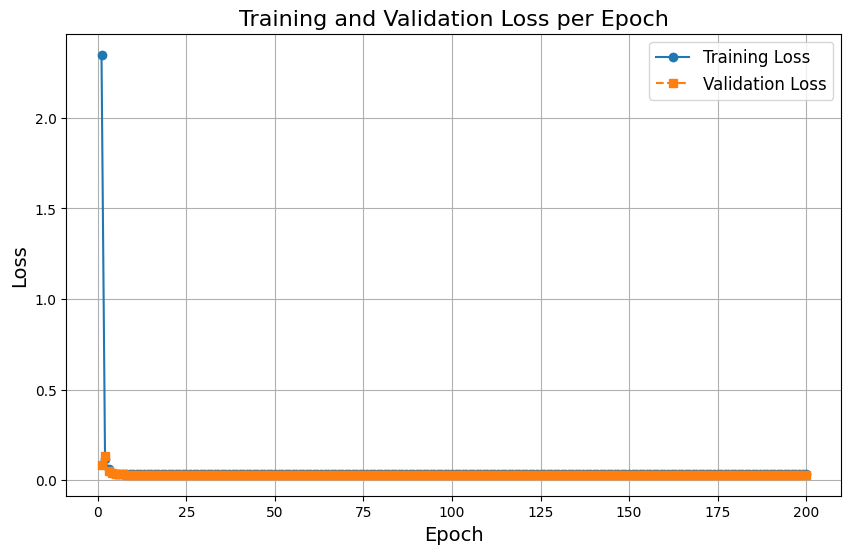

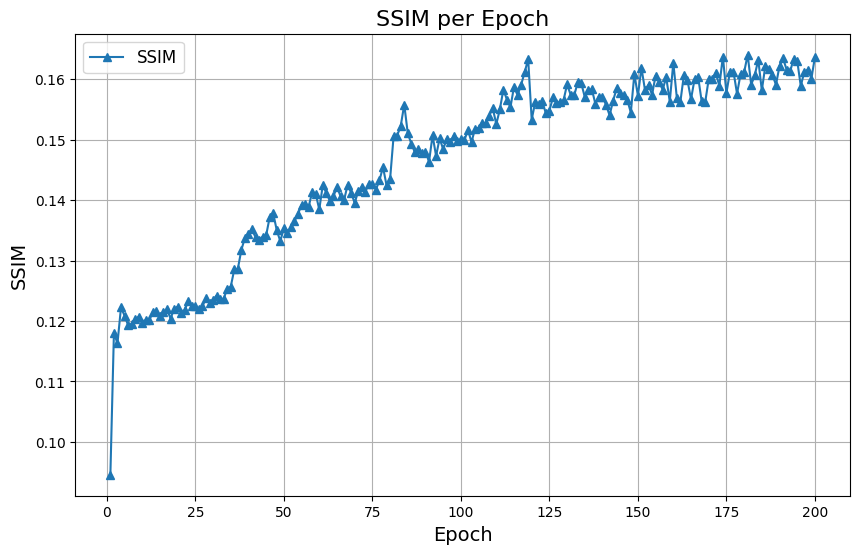

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

def evaluateEuclideanDistance(predictedImage,groundTruthImage):
    # find Euclidean distance between pixels
    pixelDifferences = np.sqrt(np.sum((predictedImage - groundTruthImage) ** 2, axis=-1))

    # Compute the average euclidean distance for the image
    averagePixelDifferences = np.mean(pixelDifferences)
    return averagePixelDifferences

num_epochs = 200
train_losses = []
val_losses = []
similarities = []  # To store SSIM scores for each epoch
euclidean_distances = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_loop = tqdm(train_dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Training", leave=False)

    for batch in train_loop:
        rgb_images, *spectral_images = batch
        rgb_images = rgb_images.to(device)  # Input images
        spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)  # Target spectral channels

        # Forward pass
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(rgb_images)
        
        # Compute loss
        reconstruction_loss = criterion(reconstruction, spectral_images)
        kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / rgb_images.size(0)  # normalize by batch size
        loss = reconstruction_loss + kl_divergence
        loss.backward()
        optimizer.step()

        # Update progress
        train_loss += loss.item()
        train_loop.set_postfix(loss=loss.item())
    
    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    similarity_score = 0.0
    euclidean_distance_score = 0.0
    val_loop = tqdm(val_dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Validation", leave=False)

    with torch.no_grad():
        for batch in val_loop:
            rgb_images, *spectral_images = batch
            rgb_images = rgb_images.to(device)
            spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)

            reconstruction, mu, logvar = model(rgb_images)
            reconstruction_loss = criterion(reconstruction, spectral_images)
            kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            loss = reconstruction_loss + kl_divergence

            val_loss += loss.item()

            # Compute SSIM for each image in the batch
            for i in range(reconstruction.size(0)):  # Iterate over the batch size
                output_img = reconstruction[i].cpu().numpy()  # Predicted image
                groundtruth_img = spectral_images[i].cpu().numpy()  # Ground truth image

                # Normalize images to [0, 1] for SSIM computation
                output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min() + 1e-8)
                groundtruth_img = (groundtruth_img - groundtruth_img.min()) / (groundtruth_img.max() - groundtruth_img.min() + 1e-8)

                # Compute SSIM for each spectral band separately
                band_ssim = [
                    ssim(output_img[band], groundtruth_img[band], data_range=1.0)  # SSIM expects normalized data
                    for band in range(output_img.shape[0])
                ]

                # Average SSIM across bands for this image
                similarity_score += np.mean(band_ssim)
                
                band_euclidean_distance = [
                    evaluateEuclideanDistance(output_img[band], groundtruth_img[band])
                    for band in range(output_img.shape[0])
                ]
                euclidean_distance_score += np.mean(band_euclidean_distance)

            val_loop.set_postfix(loss=loss.item())
    
    avg_val_loss = val_loss / len(val_dataloader)
    avg_similarity = similarity_score / len(val_dataloader.dataset)  # Normalize over dataset size
    avg_euclidean_distance = euclidean_distance_score/len(val_dataloader.dataset)
    val_losses.append(avg_val_loss)
    similarities.append(avg_similarity)
    euclidean_distances.append(avg_euclidean_distance)

    # Print losses and similarity for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, SSIM: {avg_similarity:.4f}")

# Plotting training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', label="Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, marker='s', linestyle='--', label="Validation Loss")
plt.title("Training and Validation Loss per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plotting similarity metric
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), similarities, marker='^', linestyle='-', label="SSIM")
plt.title("SSIM per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("SSIM", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), euclidean_distances, marker='^', linestyle='-', label="Euclidean Distances")
plt.title("Euclidean Distances per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

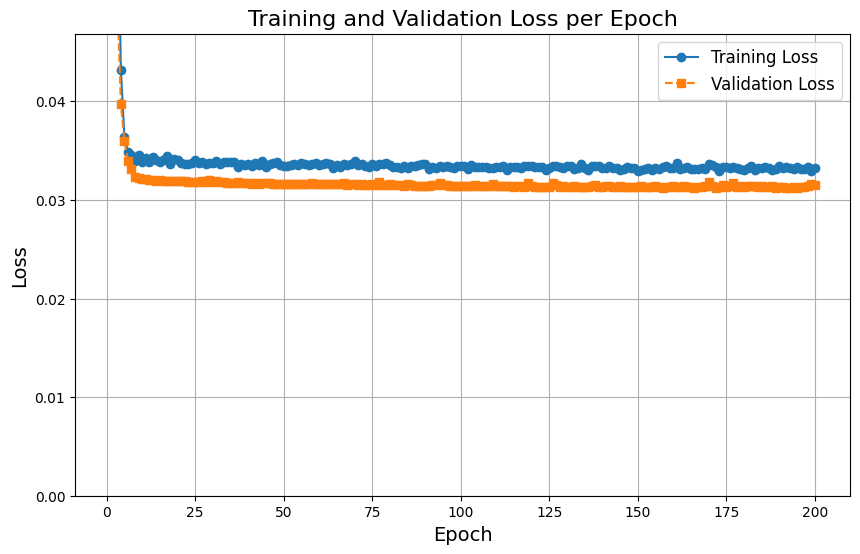

In [10]:
# Plotting training and validation loss curves with zoomed y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', label="Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, marker='s', linestyle='--', label="Validation Loss")
plt.title("Training and Validation Loss per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Adjust y-axis limits to zoom in
min_loss = min(min(train_losses), min(val_losses))
plt.ylim(0, min_loss * 1.5)  # Set upper limit slightly above the minimum loss for better visibility

plt.show()

In [11]:
def show_predictions(dataloader, model, device, channels=None):
    """
    Displays the RGB input, ground truth spectral channels, and model predictions for a single sample in a vertical layout.
    Args:
        dataloader: DataLoader to fetch data.
        model: Trained model to generate predictions.
        device: Device (CPU/GPU) to use.
        channels: List of channel names (e.g., ['Green', 'NIR', 'Red', 'Red Edge']).
    """
    model.eval()  # Set model to evaluation mode

    channels = channels or ['Green', 'NIR', 'Red', 'Red Edge']  # Default channel names
    num_spectral_channels = len(channels)

    # Get one batch of data
    rgb_images, *spectral_images = next(iter(dataloader))
    rgb_images = rgb_images.to(device)  # Move RGB inputs to the device
    spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)  # Ground truth
    predictions, _, _ = model(rgb_images)  # Model predictions

    # Use only the first sample in the batch
    rgb_image = rgb_images[1].permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC for RGB
    ground_truth = spectral_images[1].cpu().numpy()  # (num_channels, H, W)
    prediction = predictions[1].detach().cpu().numpy()  # Detach, then convert to NumPy (num_channels, H, W)

    # Create a vertical layout figure
    fig, axs = plt.subplots(num_spectral_channels, 3, figsize=(15, 5 * num_spectral_channels))
    for channel_idx in range(num_spectral_channels):
        spectral_channel_gt = ground_truth[channel_idx]  # Ground truth for this channel
        spectral_channel_pred = prediction[channel_idx]  # Prediction for this channel

        # RGB input
        if channel_idx == 0:  # Show RGB only in the first row
            axs[channel_idx, 0].imshow(rgb_image)
            axs[channel_idx, 0].set_title("RGB Input")
        else:
            axs[channel_idx, 0].axis("off")  # Keep empty for other rows

        # Ground truth
        axs[channel_idx, 1].imshow(spectral_channel_gt, cmap="viridis")
        axs[channel_idx, 1].set_title(f"GT: {channels[channel_idx]}")

        # Prediction
        axs[channel_idx, 2].imshow(spectral_channel_pred, cmap="viridis")
        axs[channel_idx, 2].set_title(f"Pred: {channels[channel_idx]}")

        # Remove axes for cleaner visualization
        axs[channel_idx, 0].axis("off")
        axs[channel_idx, 1].axis("off")
        axs[channel_idx, 2].axis("off")

    plt.tight_layout()
    plt.show()

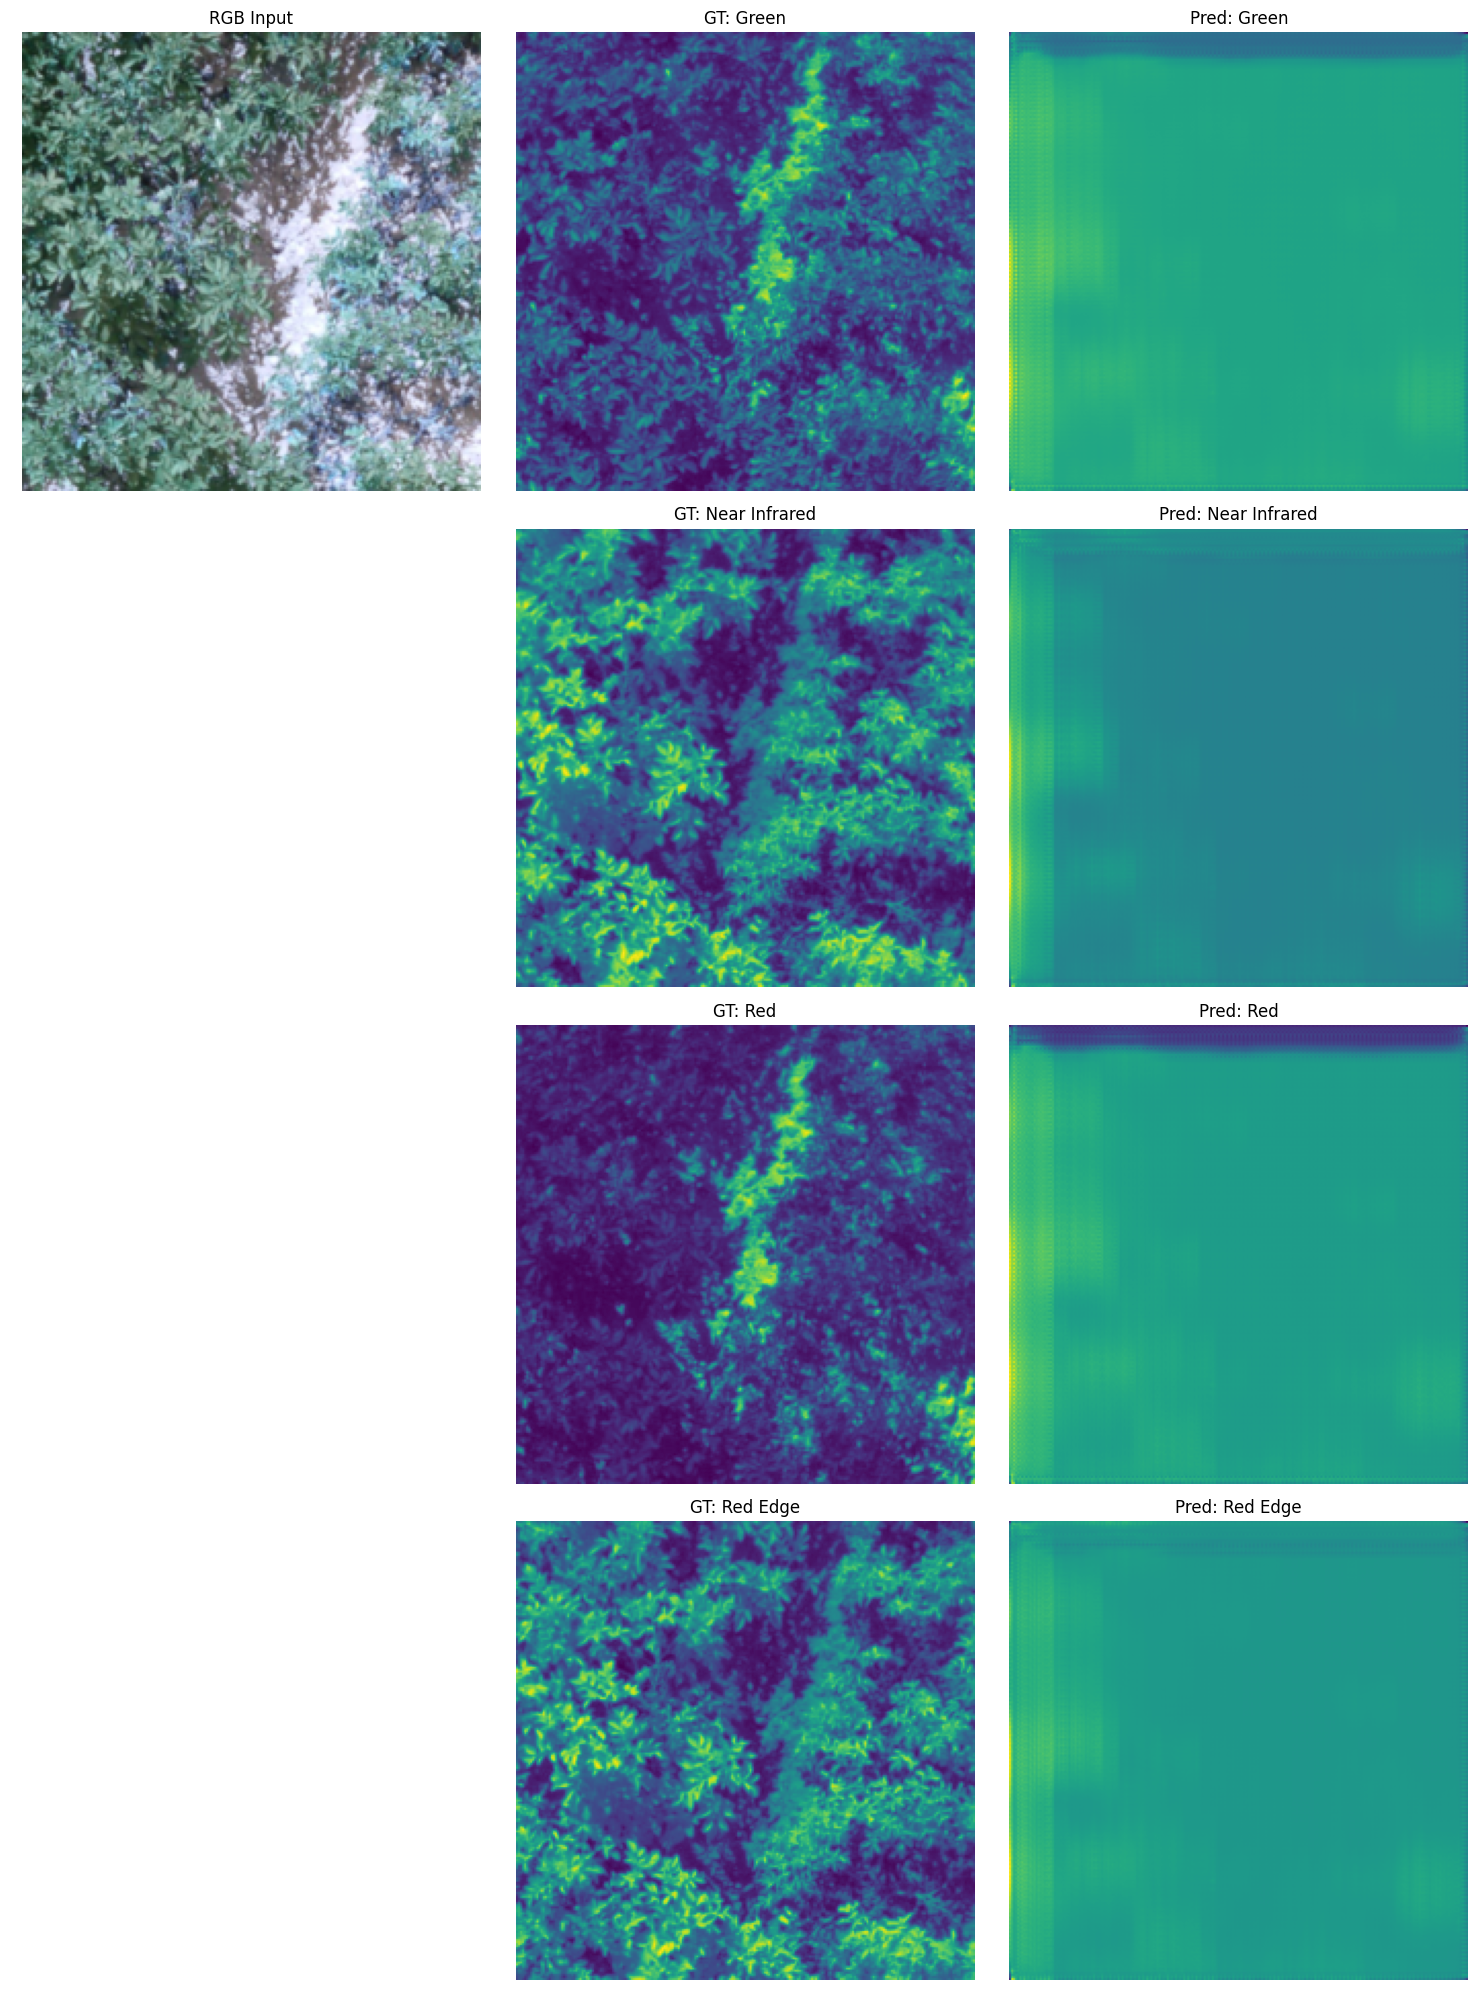

In [12]:
channels = ['Green', 'Near Infrared', 'Red', 'Red Edge']
show_predictions(test_dataloader, model, device, channels=channels)